**이진분류**

머신러닝에서 여러 개의 종류(=클래스) 중 하나를 구별해 나는 문제를 분류(classfication)라고 부른다. 2개의 클래스 중 하나를 고르는 문제를 이진 분류(binary classfication)이라 한다.

# 도미와 빙어 이진분류


35마리의 도미의 길이와(cm)와 무게(g)를 파이썬 리스트로 만들면 다음과 같다.

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

첫 번째 도미의 길이는 25.4cm이고 무게는 242.0g임을 알 수 있다. 이처럼 각 도미의 특징을 길이와 무게로 표현한 것이다. 이런 특징을 **특성**(**feature**)라고 한다. 

**특성 : 데이터의 특징**

## 데이터 시각화하기
데이터의 특성을 숫자로 보는 것보다는 그래프로 표현하는 것이 더 이해하기 쉽다. 따라서 파이썬의** 맷플롯립(matplotlib)** 패키지를 이용해 산점도 그래프를 그려보자.

<function matplotlib.pyplot.show>

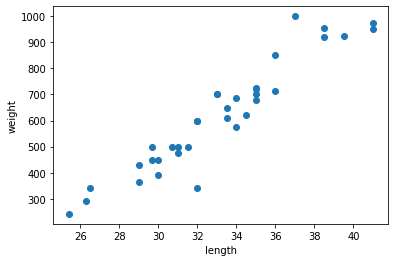

In [2]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) # (x,y) 도미의 길이, 도미의 무게
plt.xlabel('length')
plt.ylabel('weight')
plt.show

위 그래프에서 "*생선의 길이가 길수록 무게가 많이 나간다*"는 점을 확인할 수 있다. 
이렇게 산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 **선형(linear)적**이라고 말한다.

그럼 이제 빙어 데이터를 준비해보자.

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

도미에 비해 빙어는 크기도 작고, 무게도 가볍다는 것을 확인할 수 있다.

그럼 이제 도미와 빙어를 하나의 산점도 그래프로 그려보자.

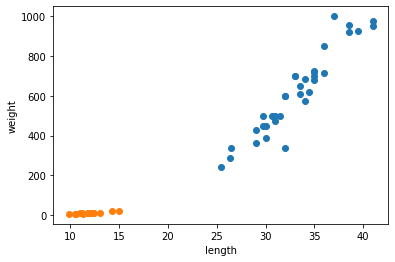

In [4]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형적이었던 도미와 달리 빙어는 그다지 선형적이지 않다. 도미는 길이과 무게가 비례하지만 빙어는 길이가 늘어나더라도 무게가 많이 늘지 않는다. 따라서 빙어는 무게가 길이에 영향을 덜 받는다고 볼 수 있다.

## k-최근접 아웃 알고리즘을 활용한 머신러닝
우선 도미와 방어 데이터를 하나의 데이터로 합쳐보자.

In [18]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

이제 사용할 머신러닝 패키지, **사이킷런**을 사용하기 위해서는 각 특성의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트(행렬)을 만들어야 한다.


파이썬의 zip()과 리스트 컴프리헨션을 사용하여 2차원 리스트를 만들 수 있다.

In [19]:
fish_data = [[l,w] for l, w in zip(length, weight)] #zip은 나열된 리스트에서 원소를 하나씩 꺼내주는 역할을 한다.

In [20]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 정답 데이터 만들기

이제 fish_data의 처음부터 35번째는 도미이고, 그 다음부터 끝까지는 빙어라는 답을 만들어야 한다.


머신러닝이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾게 하려면 어떤 생선이 도미이고 빙어인지를 알려주어야 한다. (지도학습)

도미는 1, 빙어는 0이라고 가정한다.

In [21]:
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 학습시키기

사이킷런 패키지의 k-최근접 이웃 알고리즘을 구현한 클래스를  improt해준다.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

임포트한 KNeighborsClassifier 클래스의 객체를 만들자.

In [24]:
kn = KNeighborsClassifier()

이 객체에 fish_data와 fish_target(정답)을 넘겨주어 도미(1)을 찾기 위한 기준을 학습시킬 것이다.

이런한 과정을 머신러닝에서는 **훈련**이라고 부른다.

사이킷런의 fit()매서드를 통해 훈련시킬 수 있다.

In [25]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

### 훈련 모델 평가하기

머신러닝 알고리즘을 **구현한 프로그램을 모델**이라고 부른다. (프로그램이 아니더라도 수식 등으로 구체화하여 표현한 것도 모델이라 부른다.)

이제 이 모델이 얼마나 잘 훈련되었는지 평가해보자.

score() 메서드를 사용하면 된다. 

0과 1 사이의 값을 반환하는데, 1은 모든 데이터를 정확하게 맞혔다는 것이고, 0.5는 반타작을 했다는 뜻이다.

In [26]:
kn.score(fish_data, fish_target)

1.0

이 값을 정확도라고 하는데, 이 모델의 정확도가 100%임을 의미한다.

즉, 데이터만 보고 이것이 도미인지 빙어인지를 100% 확률로 맞혔다는 것이다.

### **K-최근접 이웃 알고리즘**

k-최근접 이웃 알고리즘은은 답을 구할 때 주위의 다른 데이터를 보고 **다수를 차지하는 것**을 정답으로 사용한다. 즉, **주위의 데이터로 현재의 데이터를 판단**한다.

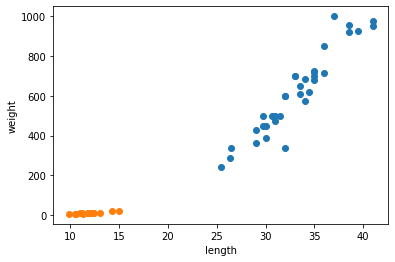

In [28]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

여기서 대략 (30,600)의 데이터, 즉 길이 30cm에 600g 생선이 모델에 들어왔다고 가정해보자.

그럼 그 점의 주변에는 도미의 데이터가 많기 때문에 이 생선을 도미라고 판단할 것이다.

In [29]:
kn.predict([[30,600]])

array([1])

predict() 메서드를 통해 새로운 데이터의 정답을 예측할 수 있다. 리스트의 리스트를 전달해야 하기 때문에 대괄호로 두 번 감싸졌다. 

1, 즉 도미로 판단한 것을 확인할 수 있다,

여기서 알 수 있는 점은, k-최근점 이웃 알고리즘을 위해 준비해야 할 것은 데이터를 모두 가지고 있는 것이다. 데이터가 많을 수록 가장 가까운 직선 거리에 어떤 데이터가 있는지를 확인하면 되기 때문이다. 

하지만 데이터가 아주 많은 경우에는 사용하기 어렵다는 것이 단점이다. 메모리가 많이 필요하고 직선거리를 계산하는데 많은 시간이 걸리기 때문이다.

In [31]:
print(kn._fit_X) # 대문자 X

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [33]:
print(kn._y) # 소문자 y

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


k-최근접 알고리즘은 위처럼 fit()에서 전달받은 데이터를 모두 저장하고 있다가 새로운 데이터가 등장하면 가장 가까운 데이터를 참고하여 도미인지 방어인지를 구분한다.

KNeighborsClassifier의 기본값은 가까운 5개의 데이터를 참고한다. 이 값은 n_neighbors 매개변수로 바꿀 수 있다.

In [36]:
kn49 = KNeighborsClassifier(n_neighbors=49) 

In [37]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

전체 49개 데이터중 도미가 35개이므로 어떤 데이터를 넣어도 35개에서 1이 반환되어 0.7xxx의 score인 것을 볼 수 있다. 

따라서 KNeighborsClassifier 기본값은 데이터의 크기에 따라서 적절히 지정해줘야 한다.